In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ephem_utils import ephem_utils
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [65]:
visit_df = pd.read_csv('/epyc/users/smotherh/DECAM_Data_Reduction/loriallen_times.dat', delimiter=' ',
                       skiprows=1, names=['visit_num', 'visit_mjd'])

In [96]:
results_file = '/epyc/users/smotherh/DECAM_Data_Reduction/kbmod_results/300/22/results_full_lc.txt'
#results_file = '/epyc/users/smotherh/DECAM_Data_Reduction/kbmod_results/300/22/results_3nights.txt'

image_file = str('/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/'+
                 'Pointing_Group_300/processed_data/rerun/rerun_processed_data/0433932/'+
                 'calexp/calexp-0433932_22.fits')

ep = ephem_utils(results_file, image_file, visit_df['visit_num'].values, visit_df['visit_mjd'].values, [433932, 433936, 433940, 433945, 433949,
                                                                                                        434610, 434614, 434622, 434626, 435498])

In [97]:
ep.results_df.head()

,lh,flux,x0,y0,x_v,y_v,obs_count
0,51.338379,1167.514038,89.0,4021.0,-58.496994,-207.676514,10.0
1,52.504288,1115.429565,129.0,2667.0,-96.969185,-188.935974,10.0
2,49.810539,1063.618896,76.0,2698.0,-43.673504,-219.940170,10.0
3,49.793983,1077.010132,181.0,2743.0,-148.411545,-265.212677,10.0
4,57.040955,1245.665527,63.0,2597.0,-30.895140,-118.556183,10.0


In [98]:
ep.get_searched_radec(0)

In [99]:
ep.format_results_mpc()

     c111112  c2015 05 20.42541 13 23 40.289-08 02 56.61                     807
     c111112  c2015 05 20.42864 13 23 40.277-08 02 56.56                     807
     c111112  c2015 05 20.43279 13 23 40.266-08 02 56.51                     807
     c111112  c2015 05 20.43700 13 23 40.236-08 02 56.39                     807
     c111112  c2015 05 21.41837 13 23 40.225-08 02 56.34                     807
     c111112  c2015 05 21.42172 13 23 36.638-08 02 41.20                     807
     c111112  c2015 05 21.42494 13 23 36.626-08 02 41.15                     807
     c111112  c2015 05 21.42820 13 23 36.602-08 02 41.05                     807
     c111112  c2015 05 21.43205 13 23 36.590-08 02 41.00                     807
     c111112  c2015 05 22.41524 13 23 29.268-08 02 10.10                     807


In [114]:
ep.coords, ep.mjd_0

(<SkyCoord (ICRS): (ra, dec) in deg
     [(200.91787216, -8.04905938), (200.91782246, -8.0490454 ),
      (200.91777294, -8.04903146), (200.9176511 , -8.04899718),
      (200.91760216, -8.04898341), (200.90265766, -8.04477839),
      (200.9026079 , -8.04476439), (200.90250855, -8.04473644),
      (200.9024589 , -8.04472247), (200.87194965, -8.03613891)]>,
 57130.27432236111)

In [107]:
date_range = np.arange(ep.mjd_0-50., ep.mjd_0+50., 0.5)
pred_ra, pred_dec = ep.predict_ephemeris(date_range)

In [109]:
pred_ra, pred_dec

([200.5635946499446,
  200.5698651010674,
  200.5761826666594,
  200.58223326642695,
  200.58832230579907,
  200.59415153353262,
  200.6000102186286,
  200.60561647155893,
  200.6112428858223,
  200.61662448152143,
  200.62201662181764,
  200.62717180060213,
  200.63232757959838,
  200.63725450794766,
  200.64217175797657,
  200.6468685338828,
  200.65154501302524,
  200.65600967379132,
  200.66044307446174,
  200.66467360702805,
  200.668861566992,
  200.67285592065699,
  200.67679603637728,
  200.6805521379635,
  200.6842419806003,
  200.68775775278905,
  200.691194888072,
  200.69446827270468,
  200.69765028708275,
  200.70067624850677,
  200.70360083069744,
  200.70638357445424,
  200.70904846501574,
  200.71158317428402,
  200.71398629502818,
  200.71627143235366,
  200.71841095184112,
  200.72044528228045,
  200.72231969149726,
  200.72410235127583,
  200.72571051681052,
  200.72724104666077,
  200.72858221621445,
  200.72986053745427,
  200.7309342827989,
  200.731960611694,
  2

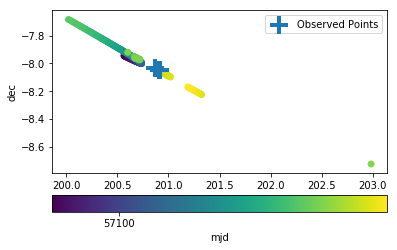

In [108]:
fig = ep.plot_predictions(date_range)

In [115]:
ep.predict_pixels('v410908-fg.fits', np.arange(ep.mjd_0, ep.mjd_0+2, 0.2))

[array([-647311.32669377, -647274.50065367, -647244.82632455,
        -647215.08541088, -647177.62224545, -647135.03879501,
        -647096.69691013, -647065.7231619 , -647034.55222686,
        -646995.35495493]),
 array([-72556.45161277, -72534.78741276, -72514.10074109, -72494.36470995,
        -72473.98972038, -72452.02427236, -72429.49322236, -72407.99152097,
        -72387.46236151, -72366.25405705])]

In [112]:
el, err, o = ep.predict_elements()

In [113]:
el, err

({'a': -0.009430600570514928,
  'aop': 230.96576822359998,
  'e': 69.63839119150818,
  'i': 1.0225378538805707,
  'lan': 57.42709140304452,
  'top': nan},
 {'a': 0.0001771303696327141,
  'aop': 0.019876009112074874,
  'e': 1.2505539920824196,
  'i': 0.0012772892811787476,
  'lan': 0.012204672033710453,
  'top': nan})